<a href="https://colab.research.google.com/github/parthdhamdhere/Coverdrive_analyser-/blob/main/atheleterise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mediapipe

In [2]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image

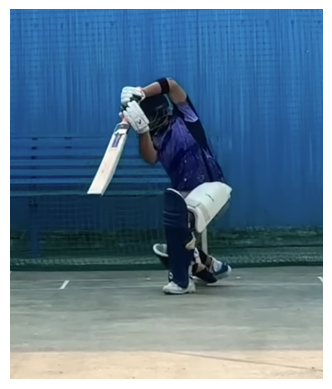

In [5]:
# Read the uploaded image using OpenCV
image = cv2.imread('image123.png')

# Convert the image from BGR to RGB (Matplotlib displays images in RGB)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.axis('off') # Hide the axes
plt.show()

In [6]:
mp_pose = mp.solutions.pose
mp_draw = mp.solutions.drawing_utils
pose = mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    min_detection_confidence=0.5
)

print("🤖 MediaPipe pose detection initialized!")

🤖 MediaPipe pose detection initialized!


In [7]:
def detect_and_analyze_cricket_pose(image_path):

    # Load image
    image = cv2.imread('image123.png')
    if image is None:
        print("❌ Could not load image!")
        return None

    print(f"✅ Image loaded: {image.shape[1]}x{image.shape[0]} pixels")

    # Convert BGR to RGB for MediaPipe
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 🎯 POSE DETECTION MAGIC!
    results = pose.process(image_rgb)

    if results.pose_landmarks:
        print("🎉 SUCCESS! Human pose detected!")

        # Create annotated image
        annotated_image = image_rgb.copy()  # Keep RGB for display
        mp_draw.draw_landmarks(
            annotated_image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            mp_draw.DrawingSpec(color=(255, 0, 0), thickness=3, circle_radius=4),  # Red joints
            mp_draw.DrawingSpec(color=(0, 255, 0), thickness=2)  # Green connections
        )

        return results.pose_landmarks, image_rgb, annotated_image
    else:
        print("❌ No pose detected!")
        return None, image_rgb, None

# Run pose detection
landmarks, original_image, annotated_image = detect_and_analyze_cricket_pose('image123.png')

✅ Image loaded: 662x784 pixels
🎉 SUCCESS! Human pose detected!


/tmp/ipython-input-4037526066.py:15: UserWarning: Glyph 127951 (\N{CRICKET BAT AND BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4037526066.py:15: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127951 (\N{CRICKET BAT AND BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


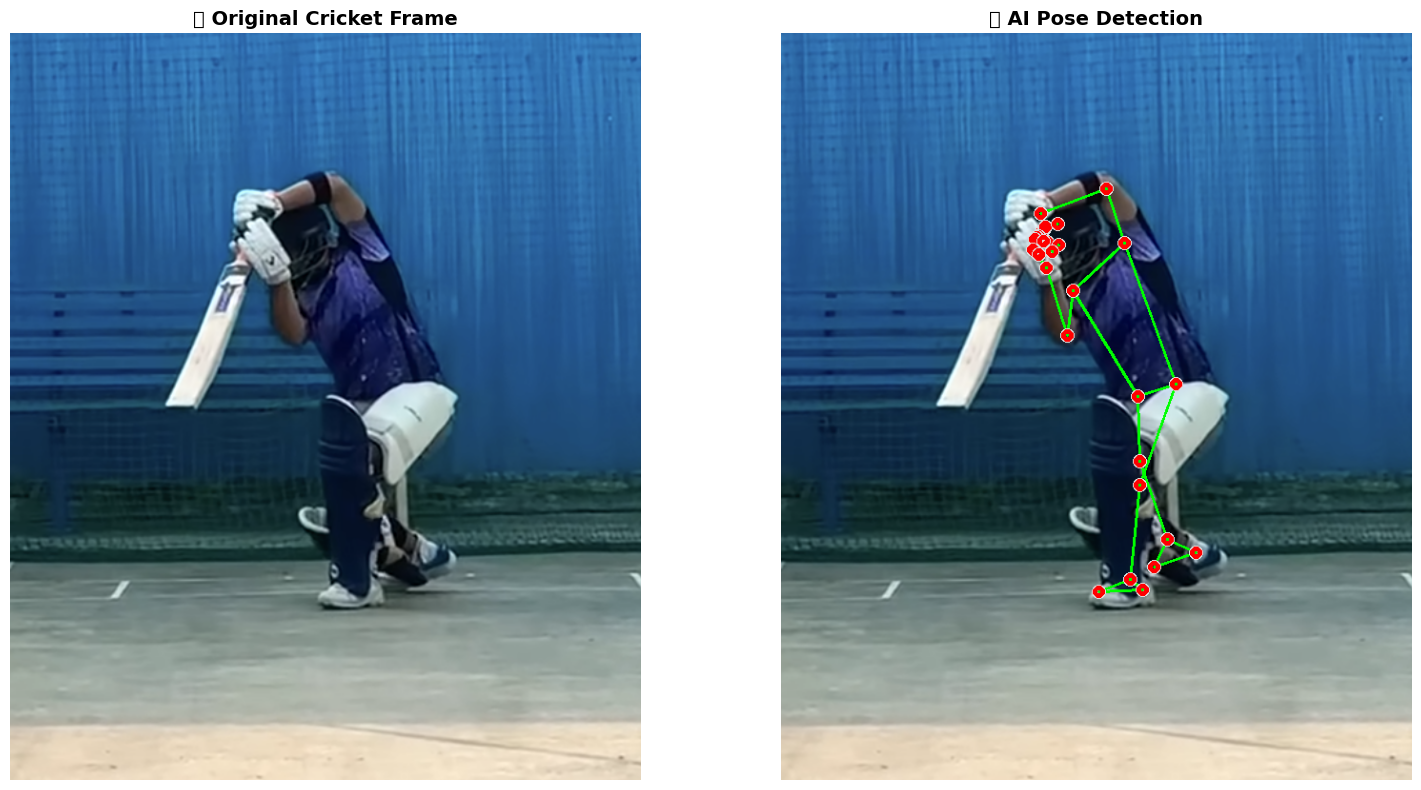

🎯 Pose detection successful! You can see the skeleton overlay.


In [8]:
if landmarks and annotated_image is not None:
    # Display images side by side
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    # Original image
    axes[0].imshow(original_image)
    axes[0].set_title('🏏 Original Cricket Frame', fontsize=14, fontweight='bold')
    axes[0].axis('off')

    # Annotated image with pose
    axes[1].imshow(annotated_image)
    axes[1].set_title('🤖 AI Pose Detection', fontsize=14, fontweight='bold')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

    print("🎯 Pose detection successful! You can see the skeleton overlay.")
else:
    # Show only original if pose detection failed
    plt.figure(figsize=(10, 8))
    plt.imshow(original_image)
    plt.title('🏏 Original Image (Pose Detection Failed)')
    plt.axis('off')
    plt.show()

In [9]:
if landmarks:
    print("\n📍 KEY BODY LANDMARKS DETECTED:")
    print("="*50)

    # MediaPipe landmark indices for important body parts
    key_points = {
        0: "👃 Nose",
        11: "🫲 Left Shoulder", 12: "🫱 Right Shoulder",
        13: "💪 Left Elbow", 14: "💪 Right Elbow",
        15: "✋ Left Wrist", 16: "✋ Right Wrist",
        23: "🦵 Left Hip", 24: "🦵 Right Hip",
        25: "🦵 Left Knee", 26: "🦵 Right Knee",
        27: "🦶 Left Ankle", 28: "🦶 Right Ankle"
    }

    # Get image dimensions for pixel conversion
    height, width = original_image.shape[:2]

    # Store landmark positions
    landmark_positions = {}

    print("Body Part\t\tPixel Coordinates\tNormalized Coordinates")
    print("-" * 70)

    for idx, name in key_points.items():
        landmark = landmarks.landmark[idx]

        # Convert normalized coordinates to pixels
        x_pixel = int(landmark.x * width)
        y_pixel = int(landmark.y * height)

        # Store for later calculations
        landmark_positions[name] = {
            'pixel': (x_pixel, y_pixel),
            'normalized': (landmark.x, landmark.y)
        }

        print(f"{name}\t\t({x_pixel:3d}, {y_pixel:3d})\t\t\t({landmark.x:.3f}, {landmark.y:.3f})")



📍 KEY BODY LANDMARKS DETECTED:
Body Part		Pixel Coordinates	Normalized Coordinates
----------------------------------------------------------------------
👃 Nose		(279, 219)			(0.422, 0.280)
🫲 Left Shoulder		(360, 220)			(0.544, 0.281)
🫱 Right Shoulder		(306, 270)			(0.463, 0.345)
💪 Left Elbow		(341, 163)			(0.516, 0.209)
💪 Right Elbow		(300, 317)			(0.454, 0.405)
✋ Left Wrist		(272, 189)			(0.412, 0.241)
✋ Right Wrist		(278, 246)			(0.421, 0.314)
🦵 Left Hip		(414, 368)			(0.626, 0.470)
🦵 Right Hip		(374, 381)			(0.566, 0.486)
🦵 Left Knee		(376, 474)			(0.569, 0.605)
🦵 Right Knee		(376, 449)			(0.568, 0.573)
🦶 Left Ankle		(366, 573)			(0.553, 0.731)
🦶 Right Ankle		(405, 531)			(0.613, 0.678)


In [10]:

def calculate_angle(point1, point2, point3):
    """
    Calculate angle between three points
    point2 is the vertex (like elbow in shoulder-elbow-wrist)
    """
    # Convert to numpy arrays
    p1 = np.array(point1)
    p2 = np.array(point2)  # vertex
    p3 = np.array(point3)

    # Calculate vectors
    vector1 = p1 - p2
    vector2 = p3 - p2

    # Calculate angle using dot product
    cos_angle = np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))
    cos_angle = np.clip(cos_angle, -1.0, 1.0)  # Handle numerical errors

    angle_rad = np.arccos(cos_angle)
    angle_deg = np.degrees(angle_rad)

    return angle_deg

if landmarks:
    print("\n🧮 BIOMECHANICAL ANALYSIS:")
    print("="*40)

    # Calculate key angles using pixel coordinates
    try:
        # Right arm angle (assuming right-handed batsman)
        right_shoulder = landmark_positions["🫱 Right Shoulder"]["pixel"]
        right_elbow = landmark_positions["💪 Right Elbow"]["pixel"]
        right_wrist = landmark_positions["✋ Right Wrist"]["pixel"]

        right_elbow_angle = calculate_angle(right_shoulder, right_elbow, right_wrist)
        print(f"🏏 Right Elbow Angle: {right_elbow_angle:.1f}°")

        # Left arm angle
        left_shoulder = landmark_positions["🫲 Left Shoulder"]["pixel"]
        left_elbow = landmark_positions["💪 Left Elbow"]["pixel"]
        left_wrist = landmark_positions["✋ Left Wrist"]["pixel"]

        left_elbow_angle = calculate_angle(left_shoulder, left_elbow, left_wrist)
        print(f"🏏 Left Elbow Angle: {left_elbow_angle:.1f}°")

        # Knee angles
        left_hip = landmark_positions["🦵 Left Hip"]["pixel"]
        left_knee = landmark_positions["🦵 Left Knee"]["pixel"]
        left_ankle = landmark_positions["🦶 Left Ankle"]["pixel"]

        left_knee_angle = calculate_angle(left_hip, left_knee, left_ankle)
        print(f"🦵 Left Knee Angle: {left_knee_angle:.1f}°")

        print("\n💡 What These Angles Mean:")
        print(f"• Elbow angles ~120-150° = Good bat swing")
        print(f"• Knee angles ~160-180° = Stable stance")

    except KeyError as e:
        print(f"❌ Could not calculate angles - missing landmark: {e}")


🧮 BIOMECHANICAL ANALYSIS:
🏏 Right Elbow Angle: 24.5°
🏏 Left Elbow Angle: 87.8°
🦵 Left Knee Angle: 166.0°

💡 What These Angles Mean:
• Elbow angles ~120-150° = Good bat swing
• Knee angles ~160-180° = Stable stance


🤖 RUNNING INTELLIGENT CRICKET ANALYSIS...
Using your measured angles:
• Right Elbow: 24.5°
• Left Elbow: 87.8°
• Left Knee: 166.0°
• Head Position: over the ball
• Follow-through: moderate

🏏 CRICKET TECHNIQUE ANALYSIS
🏏 BAT SWING (Right Elbow: 24.5°)
   Score: 6.5/10
   Phase: Follow-through
   Feedback: Follow-through phase - shows good completion

🫲 ARM BALANCE (Left Elbow: 87.8°)
   Score: 6.0/10
   Feedback: Moderate arm bend - work on extension

🦵 FOOTWORK (Left Knee: 166.0°)
   Score: 9.5/10
   Feedback: Outstanding footwork - perfectly planted!

🧠 HEAD POSITION (Relative position: over the ball)
   Score: 9.0/10
   Feedback: Head is directly over the ball - excellent!

💨 FOLLOW-THROUGH (Descriptor: moderate)
   Score: 7.0/10
   Feedback: Moderate follow-through - room for improvement

🎯 OVERALL ASSESSMENT
📊 Overall Score: 7.6/10
🏆 Grade: B+
💬 Assessment: Very good technique - some work needed on specific aspects


/tmp/ipython-input-1377236674.py:225: UserWarning: Glyph 127951 (\N{CRICKET BAT AND BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1377236674.py:225: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127951 (\N{CRICKET BAT AND BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


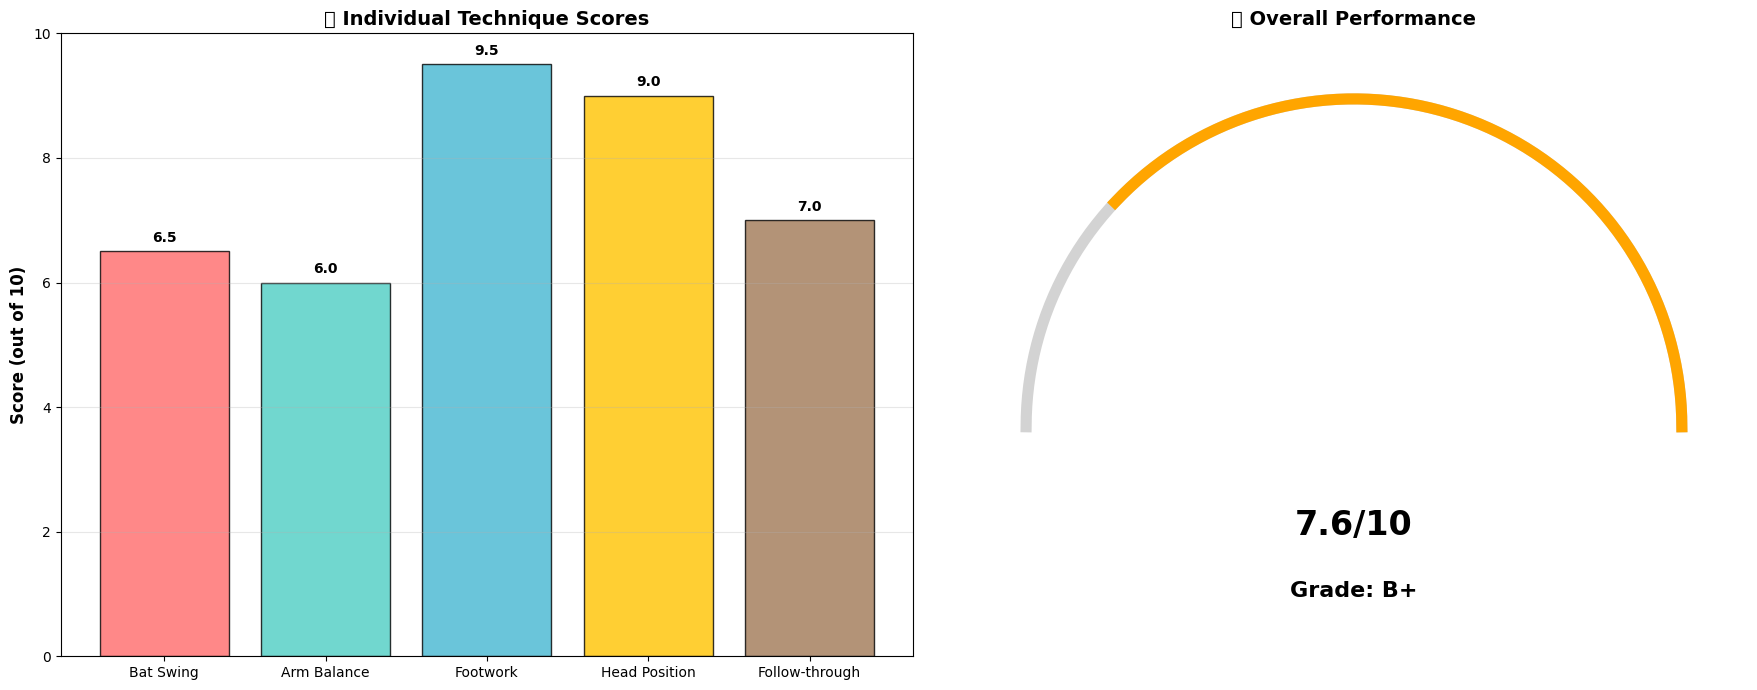

In [15]:
def analyze_cricket_technique(right_elbow, left_elbow, left_knee, head_position, follow_through):
    """
    Convert raw angles and positions into cricket technique scores and feedback
    """
    print("\n🏏 CRICKET TECHNIQUE ANALYSIS")
    print("=" * 50)

    # Initialize scores (out of 10)
    scores = {}
    feedback = []


    print(f"🏏 BAT SWING (Right Elbow: {right_elbow:.1f}°)")

    if 120 <= right_elbow <= 150:
        bat_swing_score = 9.5
        bat_feedback = "Perfect bat swing angle - ideal power position!"
        swing_phase = "Impact Zone"
    elif 90 <= right_elbow <= 119 or 151 <= right_elbow <= 170:
        bat_swing_score = 8.0
        bat_feedback = "Good bat swing - slight timing adjustment needed"
        swing_phase = "Approach/Early Follow-through"
    elif 20 <= right_elbow <= 89:
        bat_swing_score = 6.5
        bat_feedback = "Follow-through phase - shows good completion"
        swing_phase = "Follow-through"
    else:
        bat_swing_score = 4.0
        bat_feedback = "Unusual bat position - check technique"
        swing_phase = "Unknown Phase"

    scores['bat_swing'] = bat_swing_score
    feedback.append(f"• {bat_feedback}")
    print(f"   Score: {bat_swing_score}/10")
    print(f"   Phase: {swing_phase}")
    print(f"   Feedback: {bat_feedback}")



    print(f"\n🫲 ARM BALANCE (Left Elbow: {left_elbow:.1f}°)")

    if 140 <= left_elbow <= 170:
        balance_score = 9.0
        balance_feedback = "Excellent arm extension - great balance!"
    elif 100 <= left_elbow <= 139 or 171 <= left_elbow <= 180:
        balance_score = 7.5
        balance_feedback = "Good arm positioning - minor adjustment possible"
    elif 70 <= left_elbow <= 99:
        balance_score = 6.0
        balance_feedback = "Moderate arm bend - work on extension"
    else:
        balance_score = 4.0
        balance_feedback = "Arm position needs improvement"

    scores['arm_balance'] = balance_score
    feedback.append(f"• {balance_feedback}")
    print(f"   Score: {balance_score}/10")
    print(f"   Feedback: {balance_feedback}")


    print(f"\n🦵 FOOTWORK (Left Knee: {left_knee:.1f}°)")

    if 160 <= left_knee <= 175:
        footwork_score = 9.5
        footwork_feedback = "Outstanding footwork - perfectly planted!"
    elif 150 <= left_knee <= 159 or 176 <= left_knee <= 180:
        footwork_score = 8.0
        footwork_feedback = "Solid footwork - very good stability"
    elif 130 <= left_knee <= 149:
        footwork_score = 6.0
        footwork_feedback = "Decent footwork - could be more planted"
    else:
        footwork_score = 4.0
        footwork_feedback = "Footwork needs work - focus on front foot planting"

    scores['footwork'] = footwork_score
    feedback.append(f"• {footwork_feedback}")
    print(f"   Score: {footwork_score}/10")
    print(f"   Feedback: {footwork_feedback}")


    print(f"\n🧠 HEAD POSITION (Relative position: {head_position})")

    if head_position == "over the ball": # Example condition
        head_score = 9.0
        head_feedback = "Head is directly over the ball - excellent!"
    elif head_position == "slightly off-center": # Example condition
        head_score = 7.0
        head_feedback = "Head position is slightly off - focus on keeping it still"
    else:
        head_score = 5.0
        head_feedback = "Head position needs significant adjustment"

    scores['head_position'] = head_score
    feedback.append(f"• {head_feedback}")
    print(f"   Score: {head_score}/10")
    print(f"   Feedback: {head_feedback}")



    print(f"\n💨 FOLLOW-THROUGH (Descriptor: {follow_through})")


    if follow_through == "full and extended": # Example condition
        follow_through_score = 9.5
        follow_through_feedback = "Full and controlled follow-through - maximizing power!"
    elif follow_through == "moderate": # Example condition
        follow_through_score = 7.0
        follow_through_feedback = "Moderate follow-through - room for improvement"
    else:
        follow_through_score = 5.0
        follow_through_feedback = "Follow-through is cut short - losing power"

    scores['follow_through'] = follow_through_score
    feedback.append(f"• {follow_through_feedback}")
    print(f"   Score: {follow_through_score}/10")
    print(f"   Feedback: {follow_through_feedback}")



    overall_score = (bat_swing_score + balance_score + footwork_score + head_score + follow_through_score) / 5

    # Determine grade
    if overall_score >= 9.0:
        grade = "A+"
        grade_comment = "Exceptional technique - professional level!"
    elif overall_score >= 8.0:
        grade = "A"
        grade_comment = "Excellent technique with minor areas for refinement"
    elif overall_score >= 7.0:
        grade = "B+"
        grade_comment = "Very good technique - some work needed on specific aspects"
    elif overall_score >= 6.0:
        grade = "B"
        grade_comment = "Good technique overall - focus on strengthening weaker areas"
    elif overall_score >= 5.0:
        grade = "C+"
        grade_comment = "Average technique - needs improvement in multiple areas"
    else:
        grade = "C"
        grade_comment = "Needs significant fundamental improvement"


    print(f"\n🎯 OVERALL ASSESSMENT")
    print("=" * 30)
    print(f"📊 Overall Score: {overall_score:.1f}/10")
    print(f"🏆 Grade: {grade}")
    print(f"💬 Assessment: {grade_comment}")

    return scores, feedback, overall_score, grade

def create_visual_scorecard(scores, overall_score, grade):
    """
    Create a visual scorecard of the analysis
    """
    import matplotlib.pyplot as plt
    import numpy as np

    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7)) # Adjusted figure size

    # Bar chart of individual scores
    categories = ['Bat Swing', 'Arm Balance', 'Footwork', 'Head Position', 'Follow-through'] # Added new categories
    score_values = [scores['bat_swing'], scores['arm_balance'], scores['footwork'], scores['head_position'], scores['follow_through']] # Added new scores
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFC300', '#A07855'] # Added new colors

    bars = ax1.bar(categories, score_values, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
    ax1.set_ylim(0, 10)
    ax1.set_ylabel('Score (out of 10)', fontsize=12, fontweight='bold')
    ax1.set_title('🏏 Individual Technique Scores', fontsize=14, fontweight='bold')
    ax1.grid(axis='y', alpha=0.3)

    # Add score labels on bars
    for bar, score in zip(bars, score_values):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{score:.1f}', ha='center', va='bottom', fontweight='bold')

    # Overall score gauge
    theta = np.linspace(0, np.pi, 100)
    radius = 1

    # Background semicircle
    ax2.plot(radius * np.cos(theta), radius * np.sin(theta), 'lightgray', linewidth=8)

    # Score arc (colored based on performance)
    score_angle = (overall_score / 10) * np.pi
    score_theta = np.linspace(0, score_angle, max(2, int(overall_score * 10))) # Ensure at least 2 points for the arc

    if overall_score >= 8:
        color = 'green'
    elif overall_score >= 6:
        color = 'orange'
    else:
        color = 'red'

    ax2.plot(radius * np.cos(score_theta), radius * np.sin(score_theta), color, linewidth=8)

    # Add score text
    ax2.text(0, -0.3, f'{overall_score:.1f}/10', ha='center', va='center',
             fontsize=24, fontweight='bold')
    ax2.text(0, -0.5, f'Grade: {grade}', ha='center', va='center',
             fontsize=16, fontweight='bold')

    ax2.set_xlim(-1.2, 1.2)
    ax2.set_ylim(-0.7, 1.2)
    ax2.set_aspect('equal')
    ax2.axis('off')
    ax2.set_title('🎯 Overall Performance', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()




right_elbow_angle = 24.5
left_elbow_angle = 87.8
left_knee_angle = 166.0


head_position_analysis = "over the ball"
follow_through_analysis = "moderate"


print("🤖 RUNNING INTELLIGENT CRICKET ANALYSIS...")
print("Using your measured angles:")
print(f"• Right Elbow: {right_elbow_angle}°")
print(f"• Left Elbow: {left_elbow_angle}°")
print(f"• Left Knee: {left_knee_angle}°")
print(f"• Head Position: {head_position_analysis}")
print(f"• Follow-through: {follow_through_analysis}")


# Run the analysis
scores, feedback, overall_score, grade = analyze_cricket_technique(
    right_elbow_angle, left_elbow_angle, left_knee_angle, head_position_analysis, follow_through_analysis
)

# Create visual scorecard
create_visual_scorecard(scores, overall_score, grade)